## CS 504 Final Project

### Team Name: TopGun

#### Team Members: 

Yeswanth Ravichandran G01480449

Surthesh Velu Samy - G01520635

Aakiff Panjwani - G01465365

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from collections import defaultdict
from sklearn.metrics import pairwise_distances
from math import sqrt
from sklearn.metrics import mean_squared_error
import time

import warnings
warnings.filterwarnings('ignore')

In [3]:
ratings = pd.read_csv('ml-latest-small/ratings.csv')

In [4]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [5]:
movies = pd.read_csv('ml-latest-small/movies.csv')
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [6]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [7]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [8]:
ratings.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


In [9]:
most_rated = ratings.groupby('movieId')['rating'].mean().sort_values(ascending=False).head()
most_rated

movieId
99       5.0
64501    5.0
1349     5.0
86721    5.0
86668    5.0
Name: rating, dtype: float64

In [10]:
allmovies = ratings.merge(movies, on='movieId')
allmovies.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px

# Assuming `ratings` is your DataFrame containing the 'rating' column
fig = px.histogram(
    ratings,
    x='rating',
    nbins=10,
    title='Rating Distribution',
    labels={'rating': 'Rating', 'count': 'Frequency'},
)

# Customize the layout for better visualization
fig.update_layout(
    xaxis_title='Rating',
    yaxis_title='Frequency',
    title_x=0.5  # Center the title
)

# Show the plot
fig.show()



In [12]:
top_rated_movies = allmovies.groupby('title')['rating'].count().sort_values(ascending=False).head(10)
print(top_rated_movies)

title
Forrest Gump (1994)                          329
Shawshank Redemption, The (1994)             317
Pulp Fiction (1994)                          307
Silence of the Lambs, The (1991)             279
Matrix, The (1999)                           278
Star Wars: Episode IV - A New Hope (1977)    251
Jurassic Park (1993)                         238
Braveheart (1995)                            237
Terminator 2: Judgment Day (1991)            224
Schindler's List (1993)                      220
Name: rating, dtype: int64


In [13]:
fig = px.bar(top_rated_movies, 
             x=top_rated_movies.index, 
             y=top_rated_movies.values, 
             labels={'x': 'Movie Title', 'y': 'Number of Ratings'},
             title="Top 10 Most Rated Movies")

fig.show()

In [14]:
average_ratings = allmovies.groupby('title')['rating'].mean().sort_values(ascending=False).head(10)
print(average_ratings)

title
Match Factory Girl, The (Tulitikkutehtaan tyttö) (1990)    5.0
Meantime (1984)                                            5.0
Decalogue, The (Dekalog) (1989)                            5.0
Stand, The (1994)                                          5.0
Big Top Scooby-Doo! (2012)                                 5.0
I Am Not Your Negro (2017)                                 5.0
Trinity and Sartana Are Coming (1972)                      5.0
Trailer Park Boys (1999)                                   5.0
Bitter Lake (2015)                                         5.0
Black Mirror                                               5.0
Name: rating, dtype: float64


In [15]:
import plotly.express as px
from collections import Counter

genre_counts = Counter("|".join(movies['genres']).split('|'))

sorted_genre_counts = dict(sorted(genre_counts.items(), key=lambda item: item[1], reverse=True))

fig = px.bar(
    x=list(sorted_genre_counts.keys()),
    y=list(sorted_genre_counts.values()),
    labels={'x': 'Genre', 'y': 'Count'},
    title='Genre Frequency',
    # color=list(sorted_genre_counts.values()),  
    color_continuous_scale='Viridis'
)

fig.update_layout(
    coloraxis_colorbar_title='Count' 
)

fig.show()


#### Collaborative Filtering (CF)

Ullman

In [16]:
# Ullman Method with NaN and Division Handling
def calculation_ullman(movie_centered):
    similarity_matrix = np.corrcoef(movie_centered.T)
    similarity_matrix = np.nan_to_num(similarity_matrix, nan=0.0)  # Replace NaNs with 0
    return similarity_matrix

# Prediction Function with Safe Division
def prediction_ullman(similarity_matrix, movie_centered, user_means):
    weighted_sum = similarity_matrix.dot(movie_centered.T)
    sum_of_weights = np.abs(similarity_matrix).sum(axis=1, keepdims=True)
    sum_of_weights[sum_of_weights == 0] = 1e-10  # Avoid divide by zero
    predictions = weighted_sum / sum_of_weights

    user_means_aligned = user_means.values[:, np.newaxis]
    return predictions.T + user_means_aligned

# Function to calculate RMSE
def calculate_rmse(y_true, y_pred):
    mask = ~np.isnan(y_true) & ~np.isnan(y_pred)
    y_true_filtered = y_true[mask]
    y_pred_filtered = y_pred[mask]
    rmse = sqrt(mean_squared_error(y_true_filtered, y_pred_filtered))
    return rmse

In [17]:
start_time = time.time()

# Initialize an empty list to store runtimes
runtimes = []
rmses = []

# Split data into train and test sets
train_df, test_df = train_test_split(ratings, test_size=0.4, random_state=5)

# Calculate movie averages and center around these averages
movie_averages = train_df.groupby('movieId')['rating'].mean()
train_pivot = train_df.pivot(index='userId', columns='movieId', values='rating')
movie_centered = train_pivot.sub(movie_averages, axis=1)

# Calculate similarity matrix using Ullman method
similarity_matrix = calculation_ullman(movie_centered.fillna(0))

user_means = train_pivot.mean(axis=1).fillna(0)
test_pivot = test_df.pivot(index='userId', columns='movieId', values='rating')
test_predictions = prediction_ullman(similarity_matrix, movie_centered.fillna(0), user_means)

# Converting test predictions back to DataFrame
test_predictions_df = pd.DataFrame(test_predictions, index=test_pivot.index, columns=train_pivot.columns)


test_df['predicted_rating'] = test_df.apply(
    lambda x: test_predictions_df.loc[x['userId'], x['movieId']] 
    if x['movieId'] in test_predictions_df.columns and x['userId'] in test_predictions_df.index 
    else np.nan, 
    axis=1
)

# Round the predicted ratings to 1 decimal point
test_df['predicted_rating'] = test_df['predicted_rating'].round(1)

In [18]:
# Save test_df with predictions to a CSV file
test_df_filename = 'ratings_predictions_40_cf.csv'
test_df.to_csv(test_df_filename)

# Prepare data for RMSE calculation
test_pivot_masked = test_pivot.where(~test_pivot.isna(), np.nan)
test_predictions_masked = test_predictions_df.reindex_like(test_pivot_masked)

# Compute RMSE
rmse = calculate_rmse(test_pivot_masked.values.flatten(), test_predictions_masked.values.flatten())
rmses.append(rmse)

print(f'RMSE for 60% train and 40% test split using Ullman method: {rmse:.4f}')
print(f'Saved test data with predictions to {test_df_filename}')
end_time = time.time()
runtime = end_time - start_time
runtimes.append(runtime)
print("Runtime of the code is {:.2f} seconds".format(runtime))

RMSE for 60% train and 40% test split using Ullman method: 0.9423
Saved test data with predictions to ratings_predictions_40_cf.csv
Runtime of the code is 6.39 seconds


In [19]:
start_time = time.time()
# Split data into train and test sets
train_df, test_df = train_test_split(ratings, test_size=0.3, random_state=5)

# Calculate movie averages and center around these averages
movie_averages = train_df.groupby('movieId')['rating'].mean()
train_pivot = train_df.pivot(index='userId', columns='movieId', values='rating')
movie_centered = train_pivot.sub(movie_averages, axis=1)

# Calculate similarity matrix using Ullman method
similarity_matrix = calculation_ullman(movie_centered.fillna(0))
# Predict ratings for test set
user_means = train_pivot.mean(axis=1).fillna(0)
test_pivot = test_df.pivot(index='userId', columns='movieId', values='rating')
test_predictions = prediction_ullman(similarity_matrix, movie_centered.fillna(0), user_means)
# Convert test_predictions back to DataFrame
test_predictions_df = pd.DataFrame(test_predictions, index=test_pivot.index, columns=train_pivot.columns)

# Map predictions to test_df
test_df['predicted_rating'] = test_df.apply(
    lambda x: test_predictions_df.loc[x['userId'], x['movieId']] 
    if x['movieId'] in test_predictions_df.columns and x['userId'] in test_predictions_df.index 
    else np.nan, 
    axis=1
)

# Round the predicted ratings to 1 decimal point
test_df['predicted_rating'] = test_df['predicted_rating'].round(1)

In [20]:
# Save test_df with predictions to a CSV file
test_df_filename = 'ratings_predictions_30_cf.csv'
test_df.to_csv(test_df_filename)

# Prepare data for RMSE calculation
test_pivot_masked = test_pivot.where(~test_pivot.isna(), np.nan)
test_predictions_masked = test_predictions_df.reindex_like(test_pivot_masked)

# Compute RMSE
rmse = calculate_rmse(test_pivot_masked.values.flatten(), test_predictions_masked.values.flatten())
rmses.append(rmse)
print(f'RMSE for 70% train and 30% test split using Ullman method: {rmse:.4f}')
print(f'Saved test data with predictions to {test_df_filename}')
end_time = time.time()
runtime = end_time - start_time
runtimes.append(runtime)
print("Runtime of the code is {:.2f} seconds".format(runtime))

RMSE for 70% train and 30% test split using Ullman method: 0.9391
Saved test data with predictions to ratings_predictions_30_cf.csv
Runtime of the code is 7.13 seconds


In [21]:
start_time = time.time()
# Split data into train and test sets
train_df, test_df = train_test_split(ratings, test_size=0.2, random_state=5)

# Calculate movie averages and center around these averages
movie_averages = train_df.groupby('movieId')['rating'].mean()
train_pivot = train_df.pivot(index='userId', columns='movieId', values='rating')
movie_centered = train_pivot.sub(movie_averages, axis=1)

# Calculate similarity matrix using Ullman method
similarity_matrix = calculation_ullman(movie_centered.fillna(0))
# Predict ratings for test set
user_means = train_pivot.mean(axis=1).fillna(0)
test_pivot = test_df.pivot(index='userId', columns='movieId', values='rating')
test_predictions = prediction_ullman(similarity_matrix, movie_centered.fillna(0), user_means)
# Convert test_predictions back to DataFrame
test_predictions_df = pd.DataFrame(test_predictions, index=test_pivot.index, columns=train_pivot.columns)

# Map predictions to test_df
test_df['predicted_rating'] = test_df.apply(
    lambda x: test_predictions_df.loc[x['userId'], x['movieId']] 
    if x['movieId'] in test_predictions_df.columns and x['userId'] in test_predictions_df.index 
    else np.nan, 
    axis=1
)
# Round the predicted ratings to 1 decimal point
test_df['predicted_rating'] = test_df['predicted_rating'].round(1)


In [22]:
# Save test_df with predictions to a CSV file
test_df_filename = 'ratings_predictions_20_cf.csv'
test_df.to_csv(test_df_filename)

# Prepare data for RMSE calculation
test_pivot_masked = test_pivot.where(~test_pivot.isna(), np.nan)
test_predictions_masked = test_predictions_df.reindex_like(test_pivot_masked)

# Compute RMSE
rmse = calculate_rmse(test_pivot_masked.values.flatten(), test_predictions_masked.values.flatten())
rmses.append(rmse)
print(f'RMSE for 80% train and 20% test split using Ullman method: {rmse:.4f}')
print(f'Saved test data with predictions to {test_df_filename}')
end_time = time.time()
runtime = end_time - start_time
runtimes.append(runtime)
print("Runtime of the code is {:.2f} seconds".format(runtime))

RMSE for 80% train and 20% test split using Ullman method: 0.9338
Saved test data with predictions to ratings_predictions_20_cf.csv
Runtime of the code is 6.03 seconds


In [23]:
start_time = time.time()
# Split data into train and test sets
train_df, test_df = train_test_split(ratings, test_size=0.1, random_state=5)

# Calculate movie averages and center around these averages
movie_averages = train_df.groupby('movieId')['rating'].mean()
train_pivot = train_df.pivot(index='userId', columns='movieId', values='rating')
movie_centered = train_pivot.sub(movie_averages, axis=1)

# Calculate similarity matrix using Ullman method
similarity_matrix = calculation_ullman(movie_centered.fillna(0))
# Predict ratings for test set
user_means = train_pivot.mean(axis=1).fillna(0)
test_pivot = test_df.pivot(index='userId', columns='movieId', values='rating')
# Align test_pivot with train_pivot
test_pivot_aligned = test_pivot.reindex_like(train_pivot)

# Predict ratings using Ullman method
test_predictions = prediction_ullman(similarity_matrix, movie_centered.fillna(0), user_means)

# Convert test_predictions back to DataFrame
test_predictions_df = pd.DataFrame(test_predictions, index=train_pivot.index, columns=train_pivot.columns)

# Align test_predictions_df with test_pivot_aligned
test_predictions_aligned = test_predictions_df.reindex_like(test_pivot_aligned)

# Map predictions to test_df
test_df['predicted_rating'] = test_df.apply(
    lambda x: test_predictions_aligned.loc[x['userId'], x['movieId']] 
    if x['movieId'] in test_predictions_aligned.columns and x['userId'] in test_predictions_aligned.index 
    else np.nan, 
    axis=1
)

# Round the predicted ratings to 1 decimal point
test_df['predicted_rating'] = test_df['predicted_rating'].round(1)

In [24]:
# Save test_df with predictions to a CSV file
test_df_filename = 'ratings_predictions_10_cf.csv'
test_df.to_csv(test_df_filename)

# Prepare data for RMSE calculation
test_pivot_masked = test_pivot.where(~test_pivot.isna(), np.nan)
test_predictions_masked = test_predictions_df.reindex_like(test_pivot_masked)

# Compute RMSE
rmse = calculate_rmse(test_pivot_masked.values.flatten(), test_predictions_masked.values.flatten())
rmses.append(rmse)
print(f'RMSE for 90% train and 10% test split using Ullman method: {rmse:.4f}')
print(f'Saved test data with predictions to {test_df_filename}')
end_time = time.time()
runtime = end_time - start_time
runtimes.append(runtime)
print("Runtime of the code is {:.2f} seconds".format(runtime))

RMSE for 90% train and 10% test split using Ullman method: 0.9323
Saved test data with predictions to ratings_predictions_10_cf.csv
Runtime of the code is 6.60 seconds


In [25]:
runtimes

[6.385008335113525, 7.126438856124878, 6.025416135787964, 6.602770566940308]

In [26]:
rmses

[0.9423250059583147,
 0.9391103806424793,
 0.9338467051514422,
 0.9323034515623083]

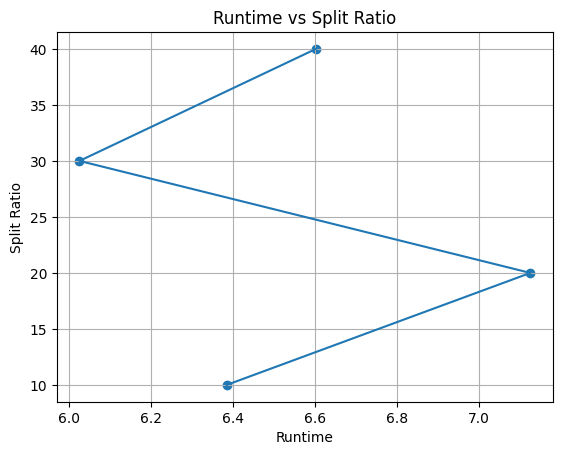

In [27]:
# Data
splits = [10, 20, 30, 40]

# Creating scatter plot
plt.scatter(runtimes, splits)
plt.plot(runtimes, splits)  # This line connects the scatter points

# Adding grid lines
plt.grid(True)

# Setting labels and title
plt.xlabel('Runtime')
plt.ylabel('Split Ratio')
plt.title('Runtime vs Split Ratio')

# Display the plot
plt.show()


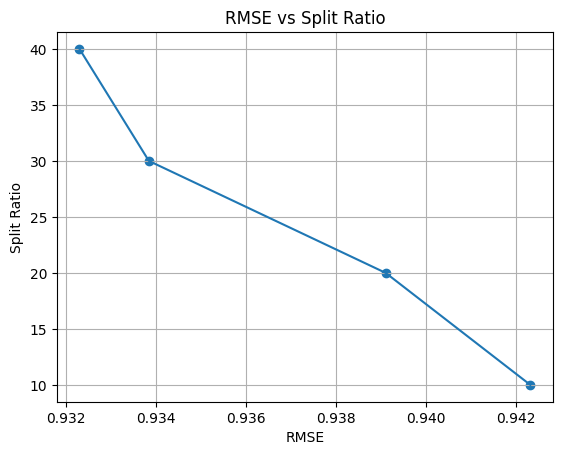

In [28]:
splits = [10, 20, 30, 40]

# Creating scatter plot
plt.scatter(rmses, splits)
plt.plot(rmses, splits)  # This line connects the scatter points

# Adding grid lines
plt.grid(True)

# Setting labels and title
plt.xlabel('RMSE')
plt.ylabel('Split Ratio')
plt.title('RMSE vs Split Ratio')

# Display the plot
plt.show()

In [ ]:
def recommend_movies_with_names(user_id, train_pivot, predictions_df, movies, n_recommendations=5):
    """
    Generate movie recommendations for a user with movie names included.
    
    Args:
        user_id (int): The ID of the user to recommend movies for.
        train_pivot (DataFrame): The training pivot table (user-movie ratings).
        predictions_df (DataFrame): DataFrame of predicted ratings.
        movies (DataFrame): Movies dataset with movieId and title.
        n_recommendations (int): Number of movies to recommend.

    Returns:
        DataFrame: A DataFrame of top-N recommended movies with predicted ratings and titles.
    """
    # Get movies the user has already rated
    rated_movies = train_pivot.loc[user_id].dropna().index.tolist()

    # Filter out movies the user has already rated
    user_predictions = predictions_df.loc[user_id].drop(rated_movies, errors='ignore')

    # Sort movies by predicted rating in descending order
    top_movies = user_predictions.sort_values(ascending=False).head(n_recommendations)

    # Add movie titles
    recommendations = top_movies.reset_index().rename(columns={user_id: 'predicted_rating', 'movieId': 'movieId'})
    recommendations = recommendations.merge(movies[['movieId', 'title']], on='movieId', how='left')
    recommendations = recommendations.rename(columns={'title': 'Movie Title', 'predicted_rating': 'Predicted Rating', 'movieId': 'Movie ID'})
    return recommendations

# Example: Recommend top 5 movies for user
user_id = 5
recommendations_with_names = recommend_movies_with_names(user_id, train_pivot, test_predictions_df, movies, n_recommendations=10)
display(f"Movie recommendations for user {user_id}:", recommendations_with_names)

'Movie recommendations for user 10:'

,Movie ID,Predicted Rating,Movie Title
0,68269,3.348122,"Young Victoria, The (2009)"
1,105355,3.302666,Blue Is the Warmest Color (La vie d'Adèle) (2013)
2,132660,3.299596,Man Up (2015)
3,102194,3.298126,Mud (2012)
4,78266,3.292452,Splice (2009)
5,85397,3.292048,Red Riding Hood (2011)
6,1696,3.290371,Bent (1997)
7,100882,3.289218,Journey to the West: Conquering the Demons (Da...
8,26606,3.288940,"Chinese Ghost Story, A (Sinnui yauwan) (1987)"
9,1733,3.288665,Afterglow (1997)
